## Greenhouse Gas Emissions Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv(r"C:/Users/Zana/Desktop/projectData/cleaned_greenhouse_data.csv")
df.head()

,region,anzsic_descriptor,sub_industry,household_category,gas,units,magnitude,year,data_val
0,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2007,45.92
1,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2008,45.88
2,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2009,43.71
3,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2010,39.61
4,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2011,40.99


### Time Series Decomposition

We start by decomposing the time series data of greenhouse gas emissions for Auckland using seasonal decomposition. This helps us to understand the observed, trend, seasonal, and residual components of the emissions data.

#### Decomposition Results:
- **Observed:** Shows the raw emissions data.
- **Trend:** Represents the long-term progression of emissions.
- **Seasonal:** Illustrates repeating patterns or seasonal effects in the data.

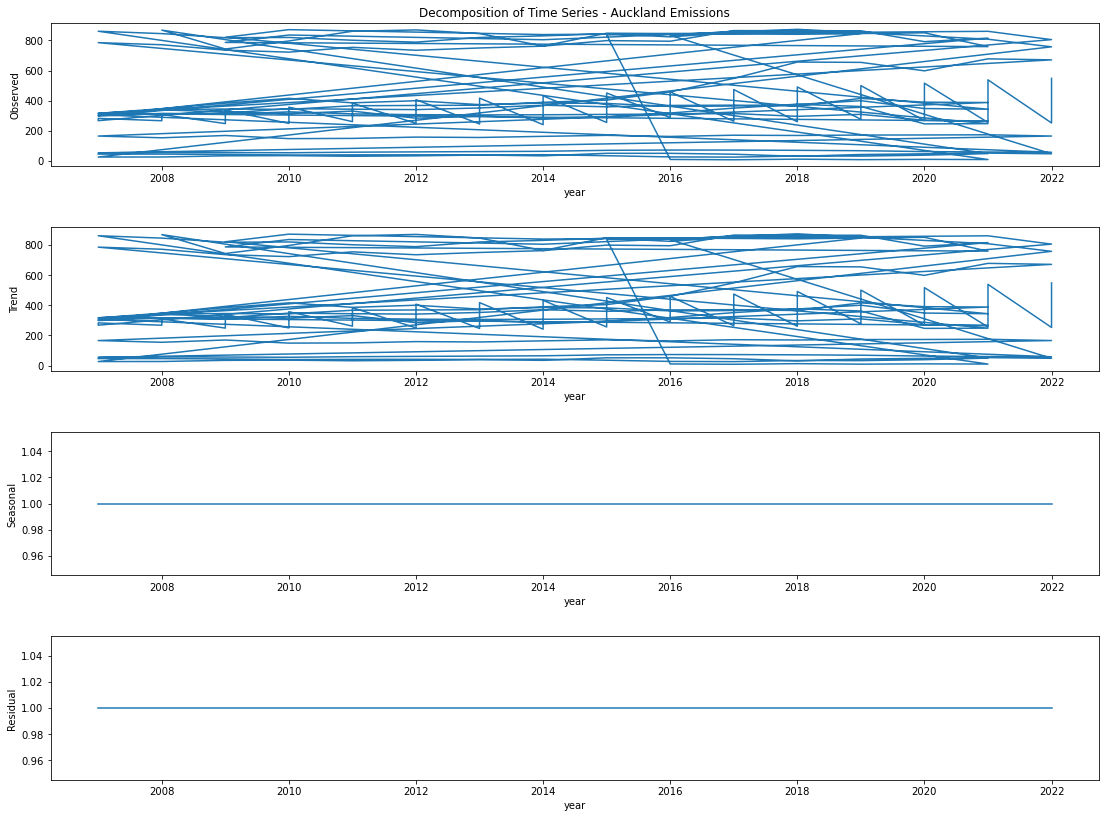

In [8]:
import statsmodels.api as sm

# Focus on Auckland region for this example
auckland_data = df[df['region'] == 'Auckland'].set_index('year')

# Since the data is annual, we specify the period as 1 (yearly)
decomposition = sm.tsa.seasonal_decompose(auckland_data['data_val'], model='multiplicative', period=1)

# Create a larger figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))

# Plot each component separately
decomposition.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
ax1.set_title('Decomposition of Time Series - Auckland Emissions')

decomposition.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')

plt.tight_layout(pad=3.0)
plt.show()


## K-Means Clustering

To understand the clustering of regions based on their average emission levels, we applied K-Means clustering with 3 clusters. This clustering helps identify groups of regions with similar emission characteristics.

#### Clustering Results:
- **Clusters:** Regions are divided into three groups based on their average emissions.
- **Visualization:** A scatter plot shows regions colored by their cluster assignment.

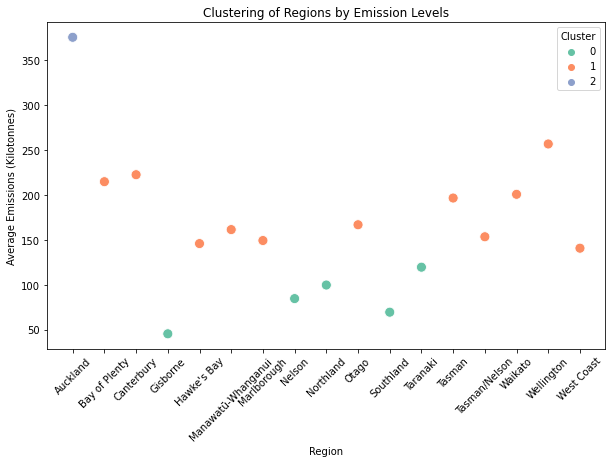

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
cluster_data = df.groupby('region')['data_val'].mean().reset_index()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data[['data_val']])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cluster_data['region'], y=cluster_data['data_val'], hue=cluster_data['Cluster'], palette='Set2', s=100)
plt.title('Clustering of Regions by Emission Levels')
plt.xlabel('Region')
plt.ylabel('Average Emissions (Kilotonnes)')
plt.xticks(rotation=45)
plt.show()

### 3. Linear Regression Model

A linear regression model was built to predict emissions based on the year. The model's performance is evaluated using Mean Absolute Error (MAE) and R-Squared metrics.

#### Model Performance:
- **Mean Absolute Error:** 148.66
- **R-Squared:** -0.004

The negative R-Squared value indicates that the model does not fit the data well. This suggests that the linear model may not be suitable for predicting emissions based on the year alone.

#### Linear Regression Results:
- **Actual vs Predicted Plot:** Shows the comparison between actual and predicted emission values over the years.

Mean Absolute Error: 148.65810556923046
R-Squared: -0.0040399096805954215


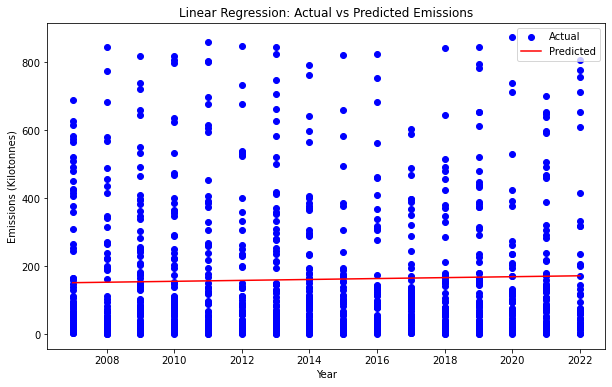

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare data for regression (using year as the feature)
X = df[['year']]
y = df['data_val']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-Squared: {r2}')

# Plot the predictions
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Sort the values of X_test and y_pred for plotting
sorted_indices = X_test.values.flatten().argsort()
plt.plot(X_test.values.flatten()[sorted_indices], y_pred[sorted_indices], color='red', label='Predicted')

plt.title('Linear Regression: Actual vs Predicted Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions (Kilotonnes)')
plt.legend()
plt.show()

### Results Summary and Explanation

1. **Time Series Decomposition:**
   - The decomposition of Auckland's emissions data showed **no significant seasonal or residual components**. This indicates the **lack of seasonal patterns or random fluctuations**, which suggests the emissions are likely consistent over time without clear cyclical trends.

2. **K-Means Clustering:**
   - The clustering analysis grouped regions into **three distinct clusters** based on their average emissions. However, the clusters show **limited differentiation**, indicating that while there are some differences in emission levels across regions, the distinctions are not as pronounced as expected.

3. **Linear Regression:**
   - The linear regression model resulted in a **Mean Absolute Error (MAE) of 148.66** and a **negative R-Squared (-0.004)** value, indicating that the model **does not fit the data well**. The poor performance suggests that a linear model is **not suitable** for predicting emissions based solely on the year, highlighting the complexity and potential non-linearity in the dataset.

